<a href="https://colab.research.google.com/github/reidnersousa/IFB_OPT3_Machine-Learning_2023-2/blob/main/aula08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O que esta ativade pretende? Resposta: Criar umclassificador, usando regressão logística, a partir de uma base de dados deanúncio. Essa base tem 5 colunas: id, gênero, idade, salário estimadoeseapessoa que recebeu o anúncio, comprou ou não o produto anunciado. As variáveis escolhidas, para fins didáticos, são idade esalárioestimado. A ideia é classificar como compra ou não compra, apartirdessas duas variáveis.

In [ ]:
import pandas as pd
import numpy as np

caminho = 'https://raw.githubusercontent.com/reidnersousa/Dataset/main/dados_anuncio.csv'
df = pd.read_csv(caminho)


df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0




seperando as colunas em variáveis independentes e dependente

In [ ]:
X = df.iloc[:,[2,3]]  ### variaveis independentes
X

y = df.iloc[:,-1]   ## dependente
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

seperando os dados em treino e  teste

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size =0.2 , random_state = 0)



colocando os dados na mesma escala

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)

criando um classificador

In [ ]:
from sklearn.linear_model import LogisticRegression
classificador = LogisticRegression(random_state=0)
classificador.fit(X_train,y_train)

LogisticRegression(random_state=0)

verificando a previsão

In [ ]:
y_pred = classificador.predict(X_test)
print(y_test)
print()
y_pred

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64



array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

matriz confusão

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

cm

array([[57,  1],
       [ 5, 17]])

verificando a precisão do modelo

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plotar_dados_treino(classificador, X_train, y_train):
    from matplotlib.colors import ListedColormap

    X_set, y_set = X_train, y_train

    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

    plt.contourf(X1, X2, classificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)

    plt.title('Classificador (Dados de Treino)')
    plt.xlabel('Idade')
    plt.ylabel('Salário Estimado')
    plt.legend()
    plt.show()


<ipython-input-48-0a739c64b398>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


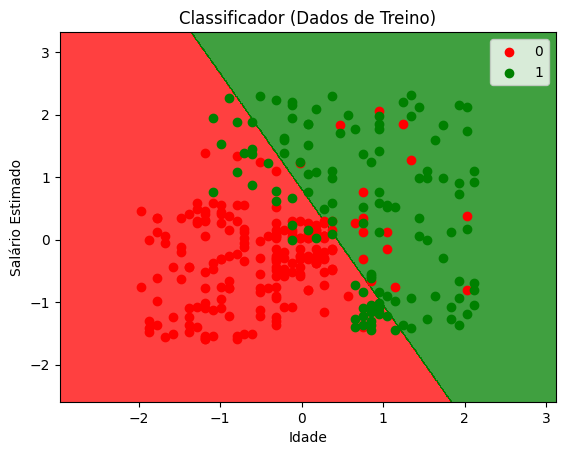

In [ ]:
plotar_dados_treino(classificador,X_train , y_train)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plotar_dados_teste(classificador, X_test, y_test):
    from matplotlib.colors import ListedColormap

    X_set, y_set = X_test, y_test

    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

    plt.contourf(X1, X2, classificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)

    plt.title('Classificador (Dados de Treino)')
    plt.xlabel('Idade')
    plt.ylabel('Salário Estimado')
    plt.legend()
    plt.show()


<ipython-input-50-59dcfb824f48>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


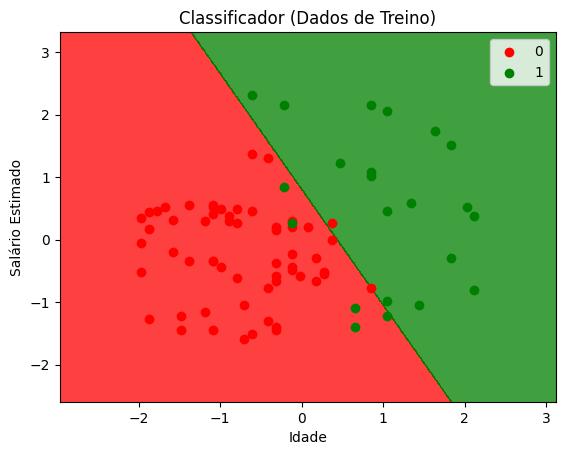

In [ ]:
plotar_dados_teste(classificador,X_test,y_test)

usando um classificador linear